In [1]:
# From Diego's script fakequake2homogenous.py

import numpy as np
from mudpy import view
import os

In [2]:
path = '/Users/sydneydybing/SW4/strain/experiments/'
files_list = os.listdir(path + 'hetero_rupts/')
# print(files_list)

rupts_list = []
for file in files_list:
    if file == '.DS_Store' or file == 'logfiles':
        continue
    rupts_list.append(file)

print(rupts_list)

['usgs_plane_fine.000003.rupt', 'usgs_plane_fine.000002.rupt', 'usgs_plane_fine.000005.rupt', 'usgs_plane_fine.000004.rupt', 'usgs_plane_fine.000001.rupt', 'usgs_plane_fine.000000.rupt']


Log file rupture velocity: 2.77 km/s
Log file Mw: 7.1
Log file hypocenter: (-118.049495, 36.180743), 10.1 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.623418122147138e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 277500000.0 m^2
M0 for slipped area: 5.623418122147138e+19
Homogeneous slip at each subfault using slip area: 4.826 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


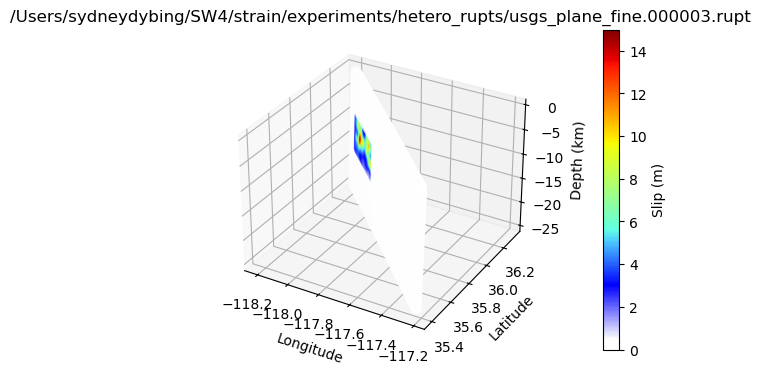

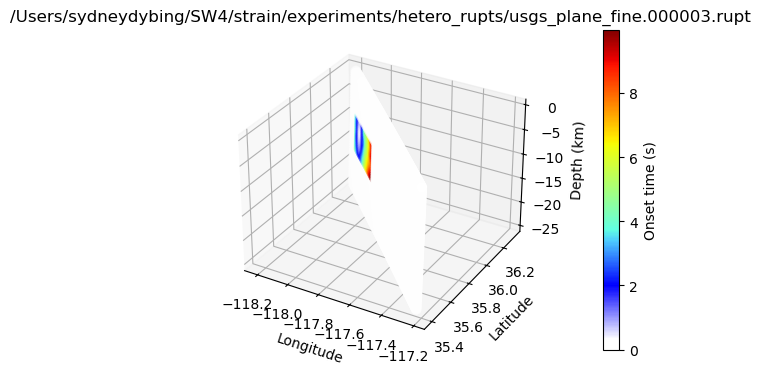

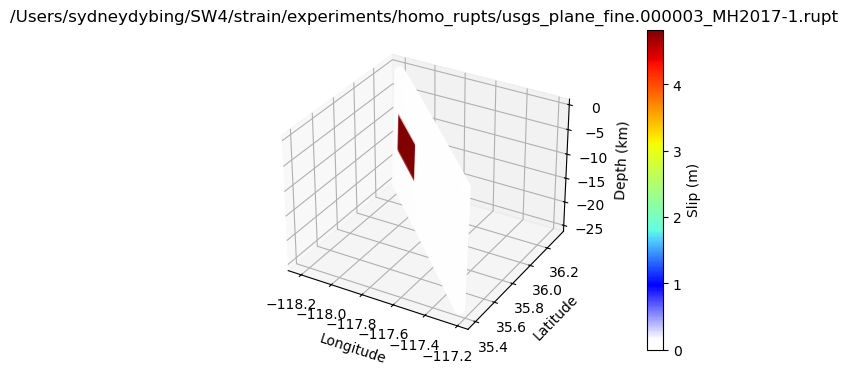

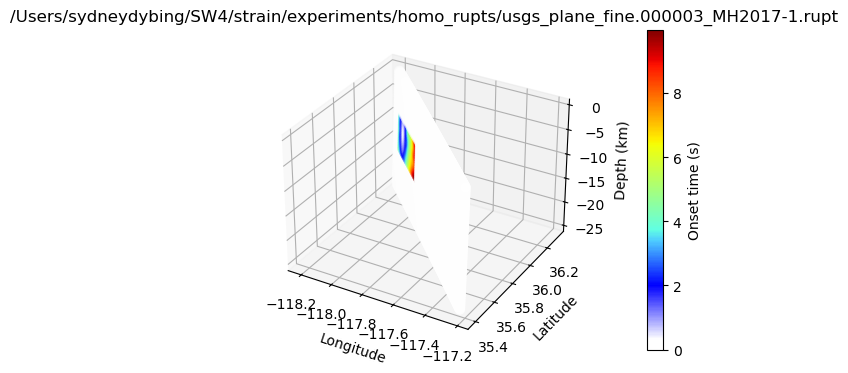

-------------------------------------------------------------
Log file rupture velocity: 2.86 km/s
Log file Mw: 7.1
Log file hypocenter: (-117.622955, 35.777562), 14.58 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.623411939228317e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 912500000.0 m^2
M0 for slipped area: 5.6234119392283165e+19
Homogeneous slip at each subfault using slip area: 1.464 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


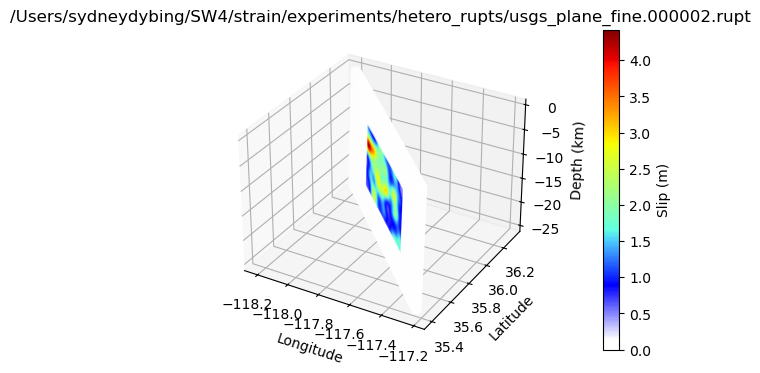

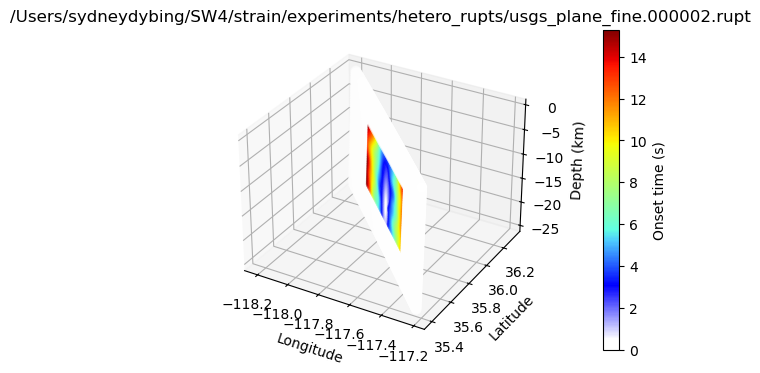

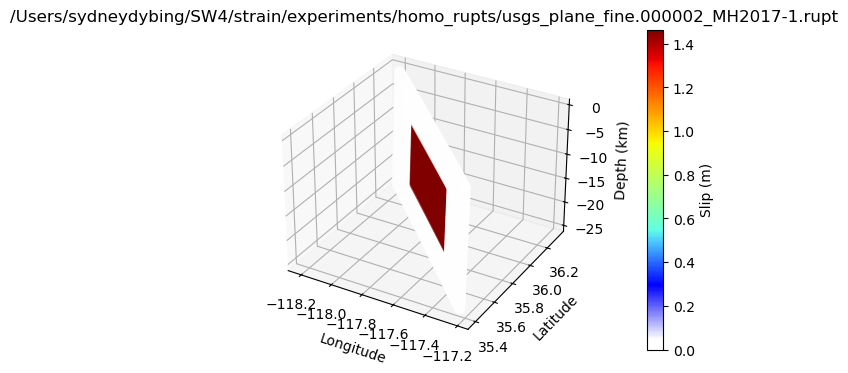

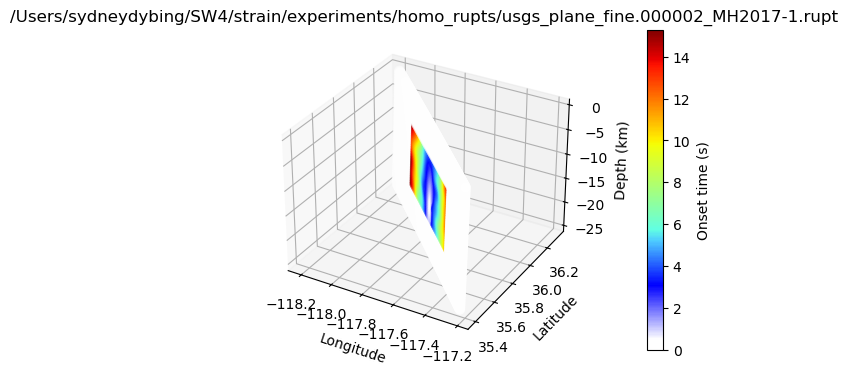

-------------------------------------------------------------
Log file rupture velocity: 2.8 km/s
Log file Mw: 7.1
Log file hypocenter: (-117.875587, 36.016836), 12.09 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.623411813335107e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 1202500000.0 m^2
M0 for slipped area: 5.623411813335107e+19
Homogeneous slip at each subfault using slip area: 1.066 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


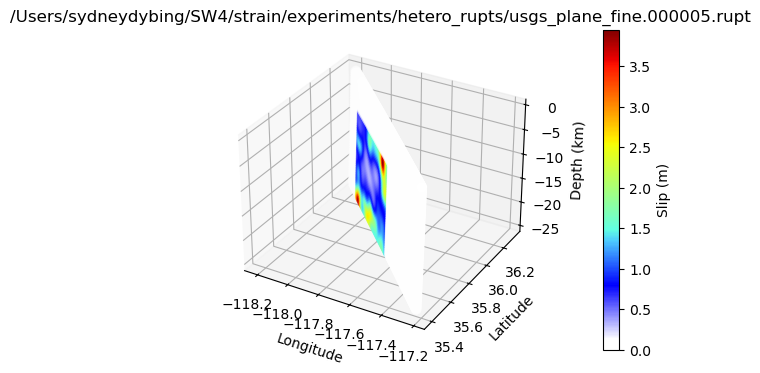

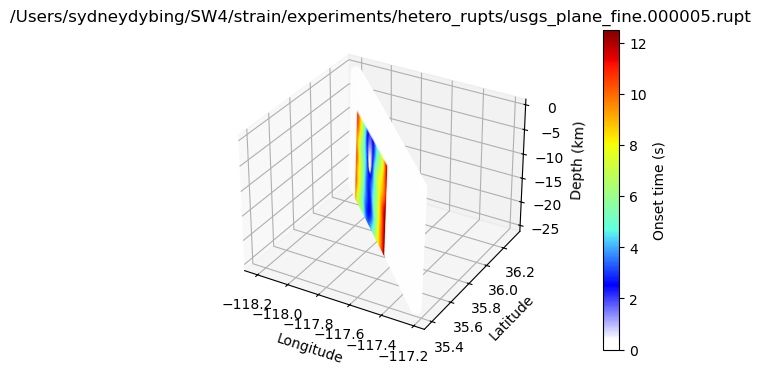

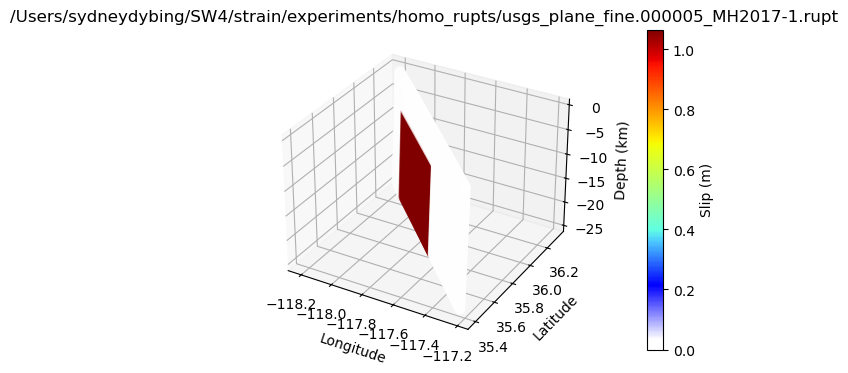

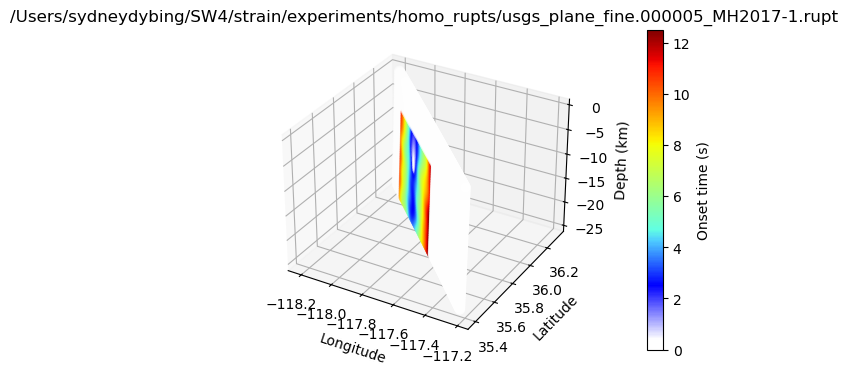

-------------------------------------------------------------
Log file rupture velocity: 2.39 km/s
Log file Mw: 7.1
Log file hypocenter: (-117.657729, 35.824579), 2.63 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.62341295842888e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 580500000.0 m^2
M0 for slipped area: 5.623412958428879e+19
Homogeneous slip at each subfault using slip area: 2.653 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


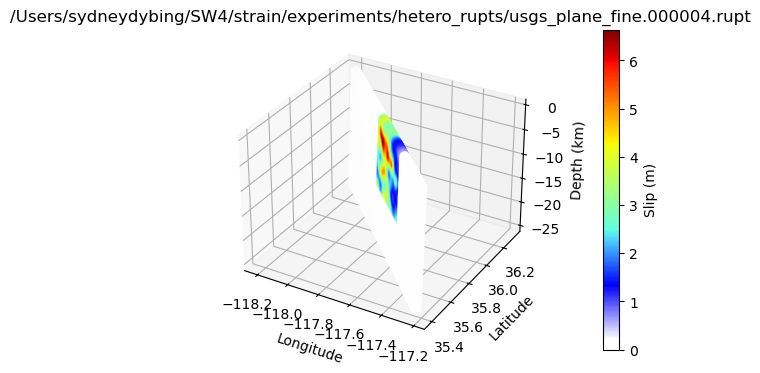

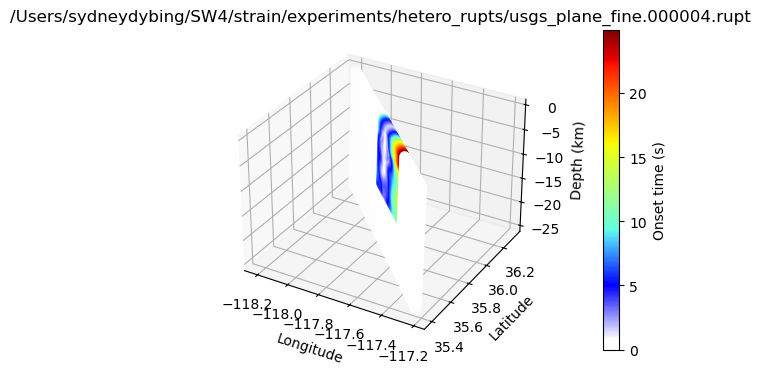

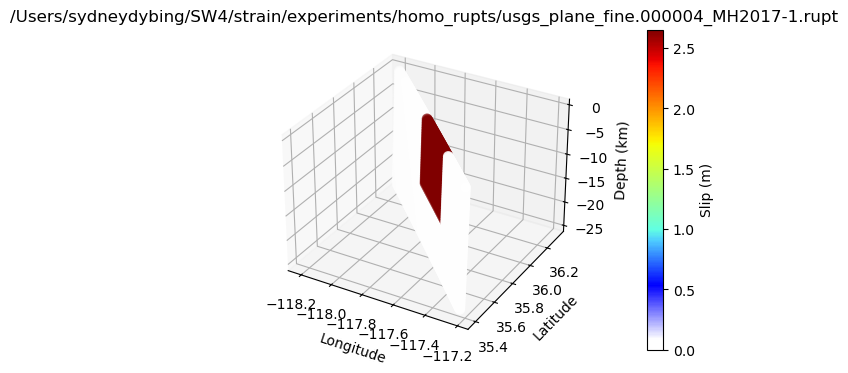

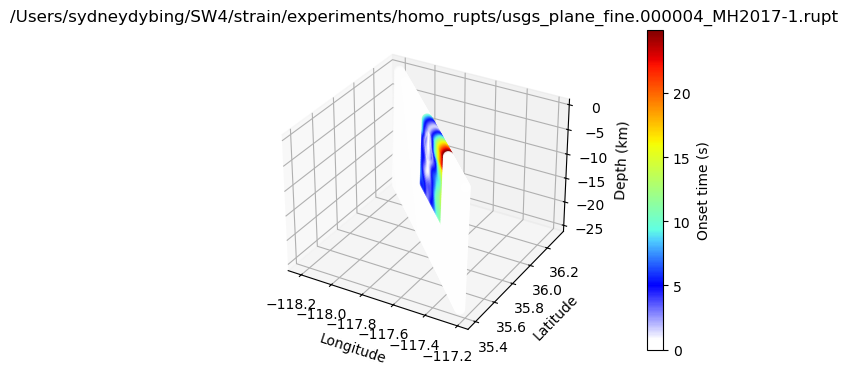

-------------------------------------------------------------
Log file rupture velocity: 2.85 km/s
Log file Mw: 7.1
Log file hypocenter: (-117.583453, 35.745836), 10.1 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.623413870396234e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 1551000000.0 m^2
M0 for slipped area: 5.623413870396234e+19
Homogeneous slip at each subfault using slip area: 0.845 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


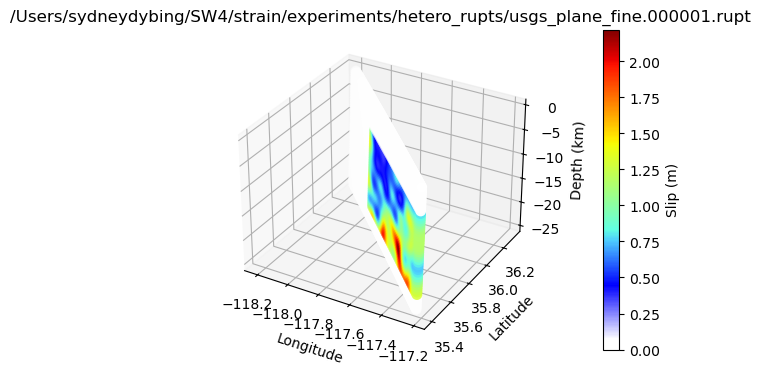

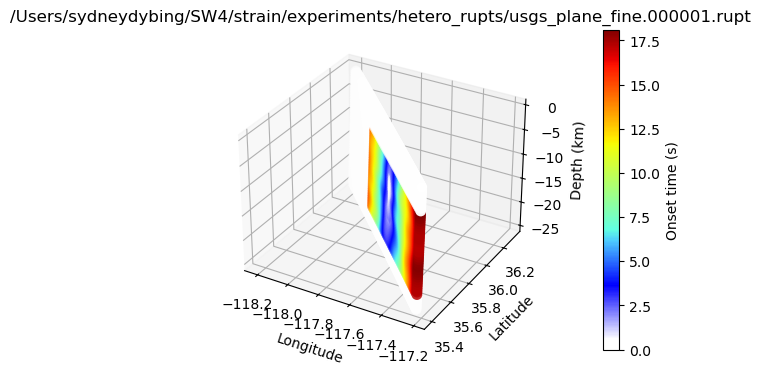

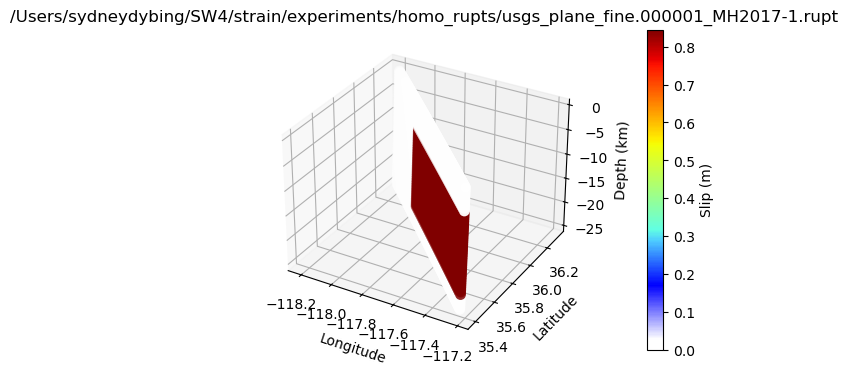

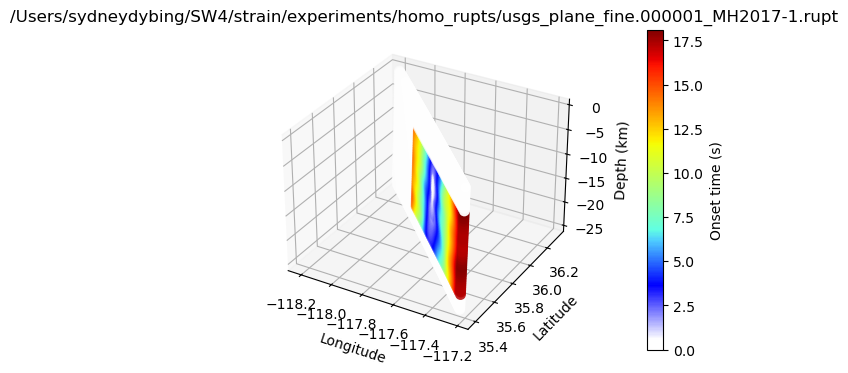

-------------------------------------------------------------
Log file rupture velocity: 2.93 km/s
Log file Mw: 7.1
Log file hypocenter: (-117.713666, 35.856642), 19.56 km deep
MH2017 rise time for this Mw: 2.8 s
Rise time to use for this rupture model: 1.8 s

Fault area: 3356500000.0 m^2
M0 for fault area: 5.62341274342458e+19
Homogeneous slip at each subfault using fault area: 0.464 m
Equivalent Mw for homogeneous slip for full fault area: 7.1

Area slipped: 808500000.0 m^2
M0 for slipped area: 5.62341274342458e+19
Homogeneous slip at each subfault using slip area: 1.528 m
Equivalent Mw for homogeneous slip for slipped area: 7.0667


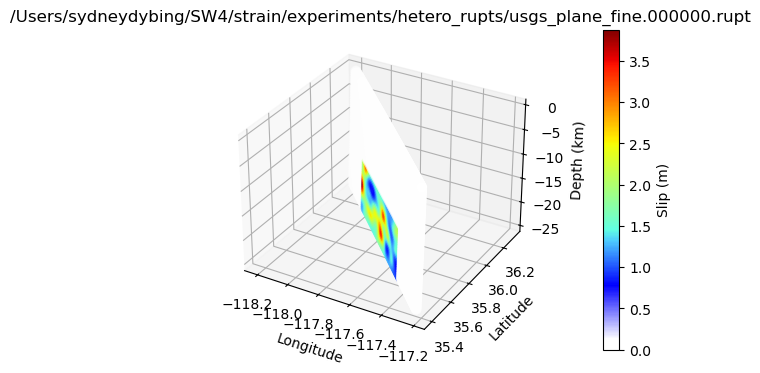

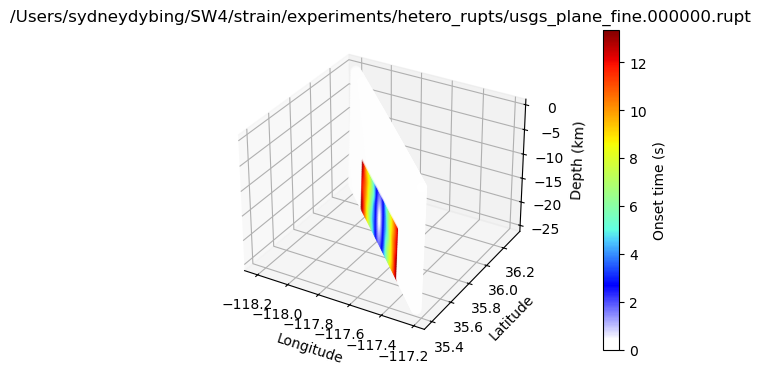

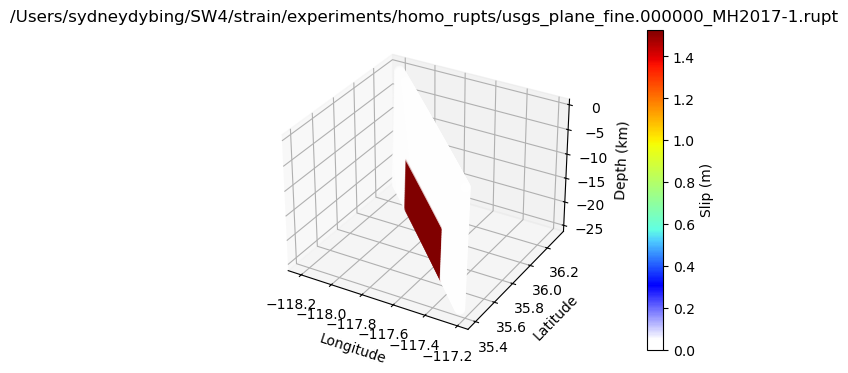

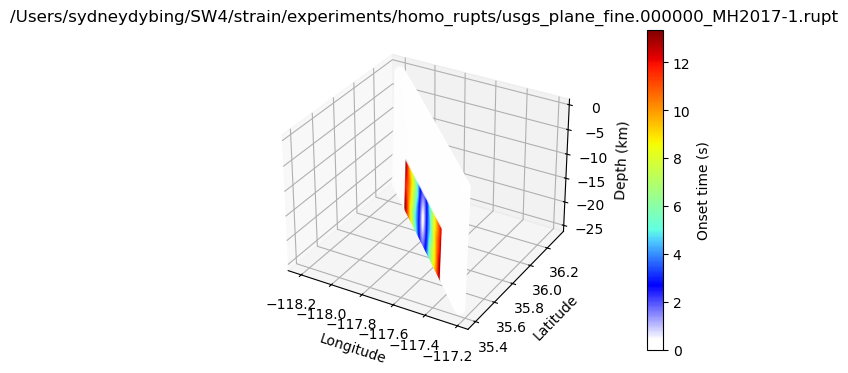

-------------------------------------------------------------


In [6]:
for rupt in rupts_list:
    
    rupt_name = rupt.split('.rupt')[0]
    # print(rupt_name)
    
    rupture = np.genfromtxt(path + 'hetero_rupts/' + rupt_name + '.rupt')
    log = open(path + 'hetero_rupts/logfiles/' + rupt_name + '.log', 'r')

    while True:
        line = log.readline()
        if 'Hypocenter (lon,lat,z[km])' in line:
            orig_hypo = line.split(':')[1].split(',')
            orig_hypo_lon = float(orig_hypo[0].split(' (')[1])
            orig_hypo_lat = float(orig_hypo[1])
            orig_hypo_depth = float(orig_hypo[2].split(')')[0])
        if 'Average Rupture Velocity (km/s):' in line:
            v_rupt = float(line.split(': ')[1])
        if 'Actual magnitude' in line:
            Mw = float(line.split()[-1])
        elif line == '':
            break
    log.close()
    
    # Calculate earthquake rise time using relation in Melgar and Hayes, 2017
    apref = -5.323
    bpref = 0.293
    M0 = 10**(1.5*Mw + 9.05)
    logS = apref + bpref * np.log10(M0)
    MH_rise_time = round(10**logS,1)
    rise_time = round(MH_rise_time-1,1)

    print('Log file rupture velocity: ' + str(round(v_rupt,2)) + ' km/s')
    print('Log file Mw: ' + str(Mw))
    print('Log file hypocenter: (' + str(orig_hypo_lon) + ', ' + str(orig_hypo_lat) + '), ' + str(orig_hypo_depth) + ' km deep')
    print('MH2017 rise time for this Mw: ' + str(MH_rise_time) + ' s')
    print('Rise time to use for this rupture model: ' + str(rise_time) + ' s')
    
    print('')

    # Calculate equivalent homogeneous slip

    slip = (rupture[:,8]**2 + rupture[:,9]**2)**0.5
    rigidity = rupture[:,13]
    fault_area = rupture[:,10] * rupture[:,11]
    M0_fault_area = np.sum(slip * fault_area * rigidity)
    equivalent_slip_fault_area = M0_fault_area / (np.sum(fault_area * rigidity)) 
    equivalent_Mw_fault_area = (2/3) * (np.log10(np.sum(fault_area * rigidity * equivalent_slip_fault_area)) - 9.1)

    print('Fault area: ' + str(np.sum(fault_area)) + ' m^2')
    print('M0 for fault area: ' + str(M0_fault_area))
    print('Homogeneous slip at each subfault using fault area: ' + str(round(equivalent_slip_fault_area,3)) + ' m')
    print('Equivalent Mw for homogeneous slip for full fault area: ' + str(round(equivalent_Mw_fault_area,4)))

    print('')

    # Where is slip non zero?
    i = np.where(slip != 0)[0]
    slip_slipped = (rupture[i,8]**2 + rupture[i,9]**2)**0.5
    rigidity_slipped = rupture[i,13]
    area_slipped = rupture[i,10] * rupture[i,11]
    M0_slip_area = np.sum(slip_slipped * area_slipped * rigidity_slipped)
    equivalent_slip_slipped_area = M0 / (np.sum(area_slipped * rigidity_slipped)) 
    equivalent_Mw_slipped_area = (2/3) * (np.log10(np.sum(area_slipped * rigidity_slipped * equivalent_slip_slipped_area)) - 9.1)

    print('Area slipped: ' + str(np.sum(area_slipped)) + ' m^2')
    print('M0 for slipped area: ' + str(M0_slip_area))
    print('Homogeneous slip at each subfault using slip area: ' + str(round(equivalent_slip_slipped_area,3)) + ' m')
    print('Equivalent Mw for homogeneous slip for slipped area: ' + str(round(equivalent_Mw_slipped_area,4)))

    # Replace heterogeneous slip and rise time with the homogeneous values
    rupture[:,7] = 0 # dura column: rise time - all zero except for the subfaults that slip
    rupture[i,7] = rise_time
    rupture[i,8] = 0
    rupture[i,8] = equivalent_slip_slipped_area # ss-slip column: Ridgecrest is mostly strike-slip
    rupture[i,9] = 0 # ds-slip column
    
    # Save new homogeneous .rupt
    out_file = path + 'homo_rupts/' + rupt_name + '_MH2017-1.rupt'
    formatter = "%d\t%.6f\t%.6f\t%.4f\t%.2f\t%.2f\t%.1f\t%.9e\t%.4e\t%.4e\t%.2f\t%.2f\t%.9e\t%.6e\t%.6f"
    np.savetxt(out_file, rupture, fmt = formatter)
    
    # Original rupture
    view.slip3D(rupt = path + 'hetero_rupts/' + rupt_name + '.rupt')
    view.slip3D(rupt = path + 'hetero_rupts/' + rupt_name + '.rupt', plot_onset = True)
    
    # Homogeneous rupture
    view.slip3D(rupt = path + 'homo_rupts/' + rupt_name + '_MH2017-1.rupt')
    view.slip3D(rupt = path + 'homo_rupts/' + rupt_name + '_MH2017-1.rupt', plot_onset = True)
    
    print('-------------------------------------------------------------')